https://www.kaggle.com/competitions/playground-series-s5e5

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from itertools import combinations

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.shape

(750000, 9)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [5]:
df_train.describe().T

count           mean            std    min        25%  \
id          750000.0  374999.500000  216506.495284    0.0  187499.75   
Age         750000.0      41.420404      15.175049   20.0      28.00   
Height      750000.0     174.697685      12.824496  126.0     164.00   
Weight      750000.0      75.145668      13.982704   36.0      63.00   
Duration    750000.0      15.421015       8.354095    1.0       8.00   
Heart_Rate  750000.0      95.483995       9.449845   67.0      88.00   
Body_Temp   750000.0      40.036253       0.779875   37.1      39.60   
Calories    750000.0      88.282781      62.395349    1.0      34.00   

                 50%        75%       max  
id          374999.5  562499.25  749999.0  
Age             40.0      52.00      79.0  
Height         174.0     185.00     222.0  
Weight          74.0      87.00     132.0  
Duration        15.0      23.00      30.0  
Heart_Rate      95.0     103.00     128.0  
Body_Temp       40.3      40.70      41.5  
Calories        77.0     136.00     314.0

In [6]:
df_train['Sex'].value_counts(1)

female    0.500961
male      0.499039
Name: Sex, dtype: float64

In [7]:
NUM_COLS = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']

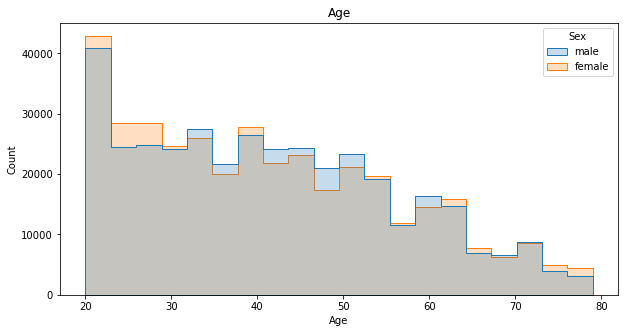

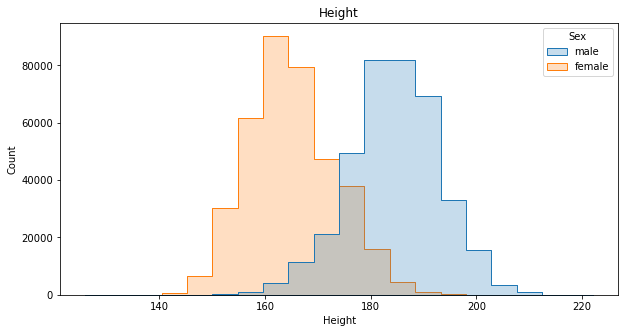

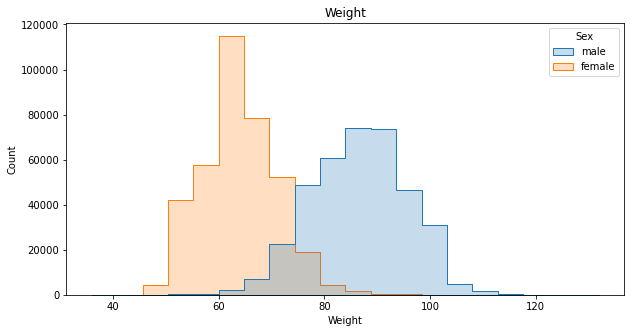

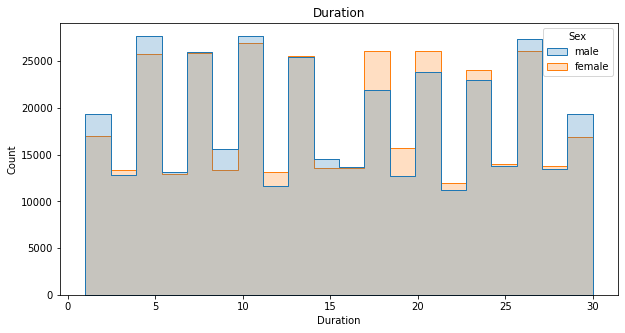

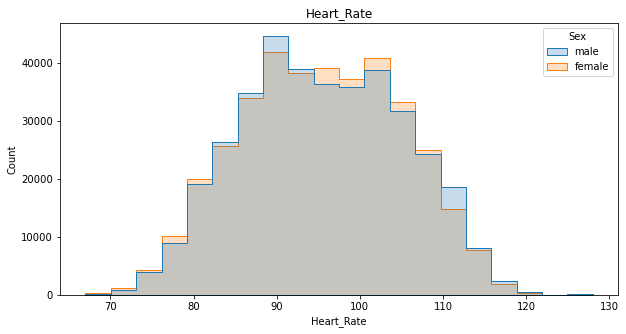

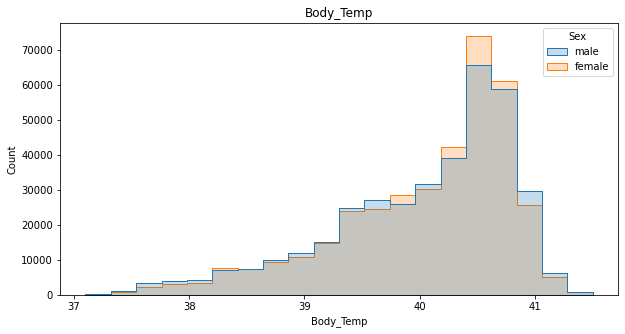

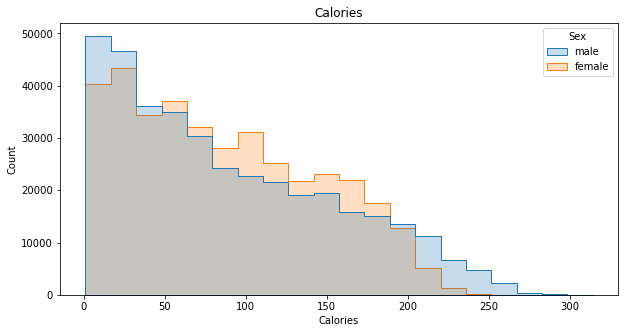

In [10]:
for col in NUM_COLS:
    
    plt.figure(figsize=(10, 5))
    plt.title(col)
    sns.histplot(data=df_train, x=col, hue='Sex', kde=False, bins=20, element='step')
    plt.show()

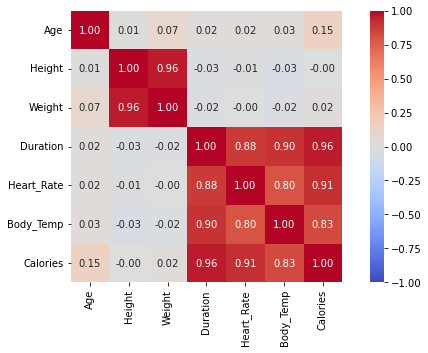

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_train[NUM_COLS].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1, vmax=1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


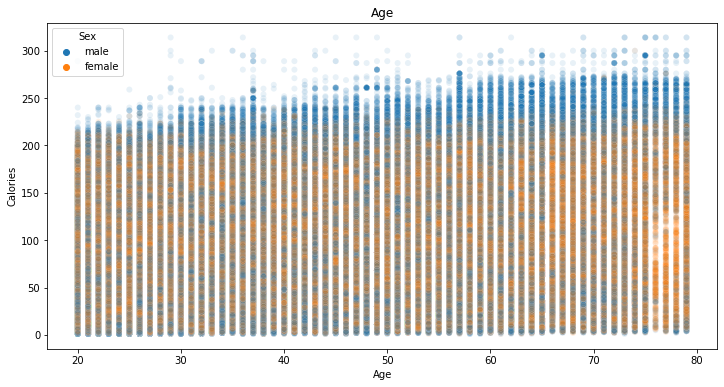

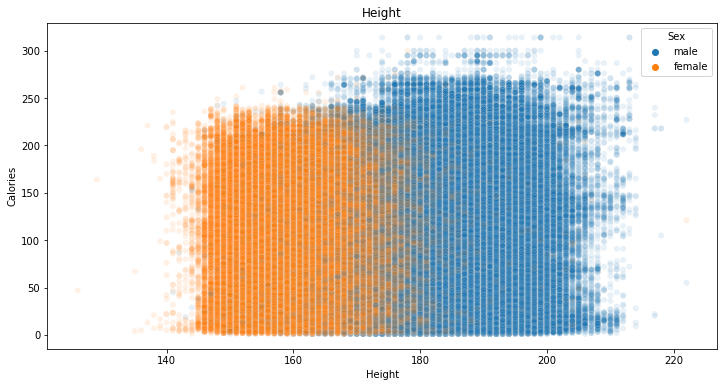

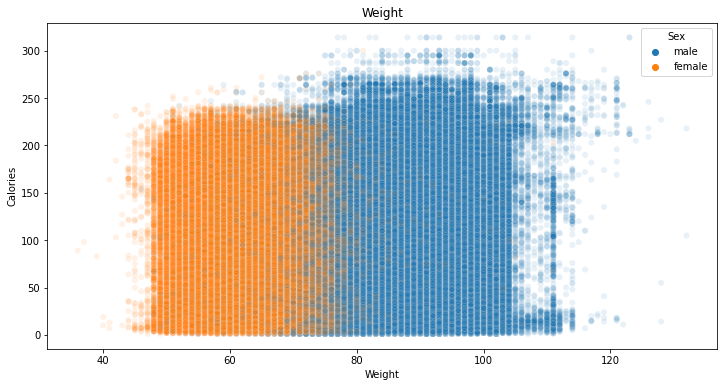

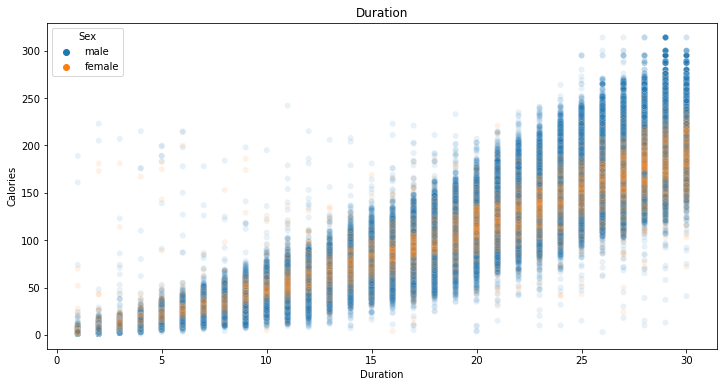

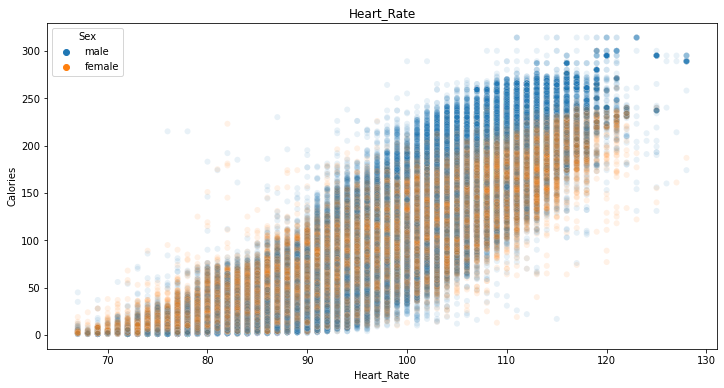

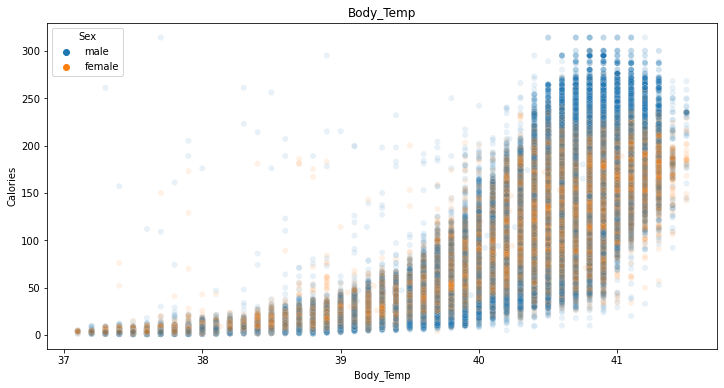

In [12]:
for col in NUM_COLS:
    
    if col == 'Calories':
        continue
    
    plt.figure(figsize=(12, 6))
    plt.title(col)
    sns.scatterplot(data=df_train , x=col, y='Calories', alpha=.1, hue='Sex')
    plt.show()

C:\Users\Fury\AppData\Local\Temp\ipykernel_28892\4105368884.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train_ply.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1, vmax=1)


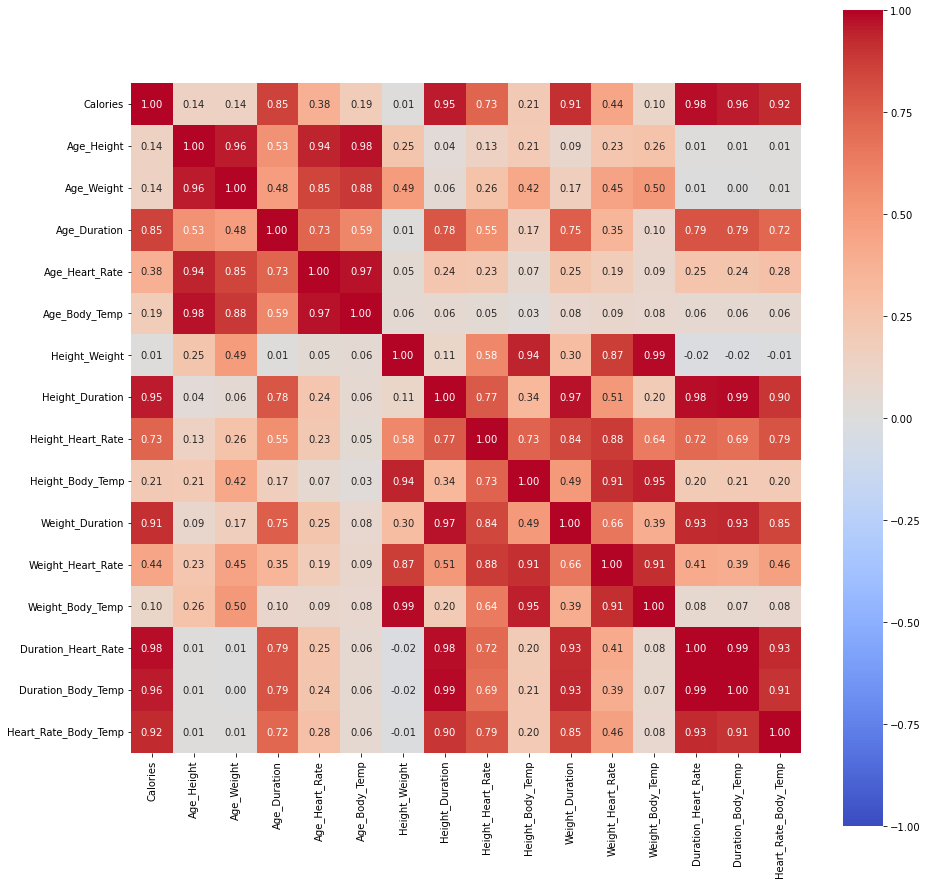

In [13]:
df_train_ply = df_train[['Calories', 'Sex']].copy()

for col_1, col_2 in list(combinations([ x for x in NUM_COLS if x != 'Calories'], 2)):
    df_train_ply[col_1 + '_' + col_2] = df_train[col_1] * df_train[col_2]
    
plt.figure(figsize=(15, 15))
sns.heatmap(df_train_ply.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1, vmax=1)
plt.show()

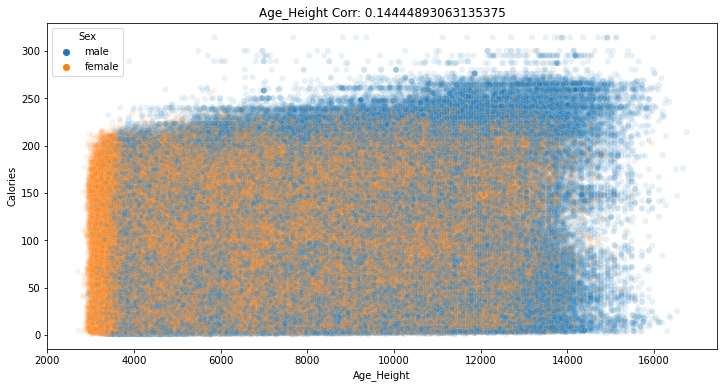

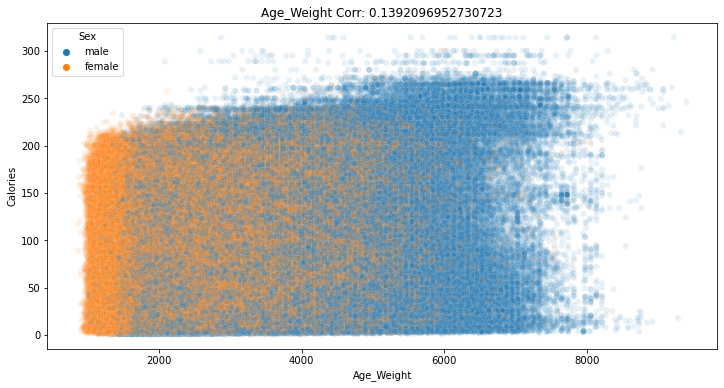

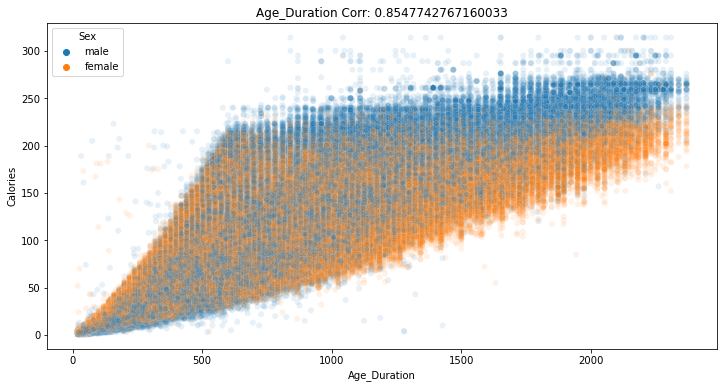

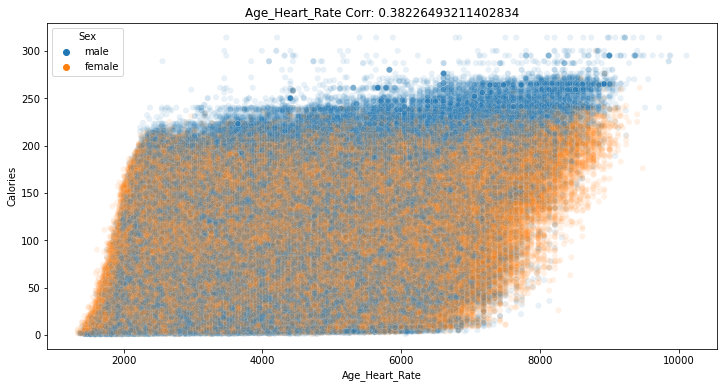

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


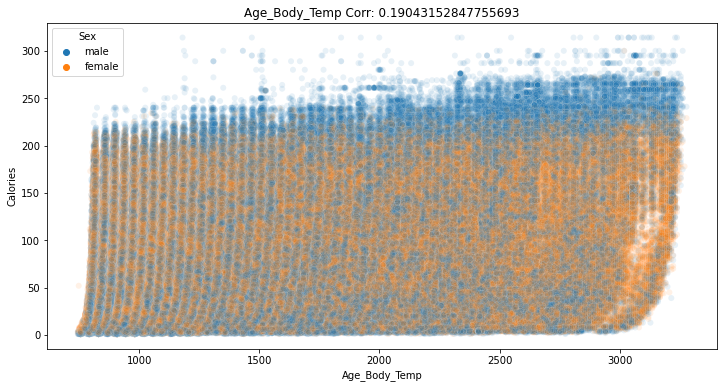

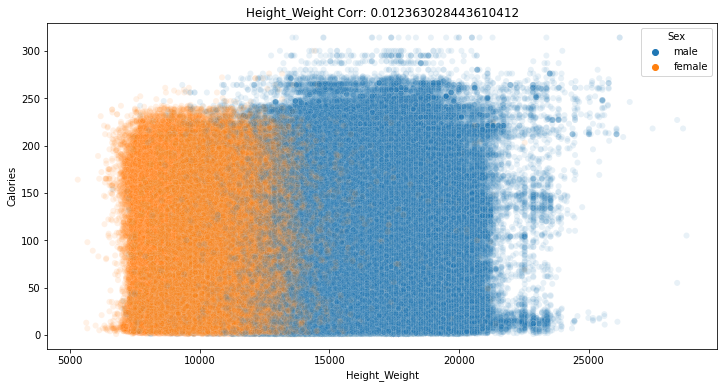

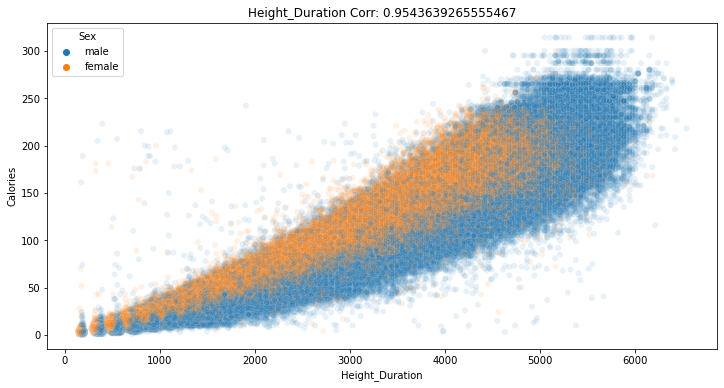

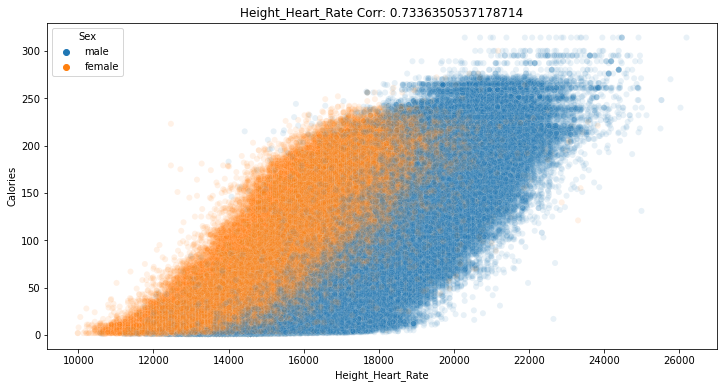

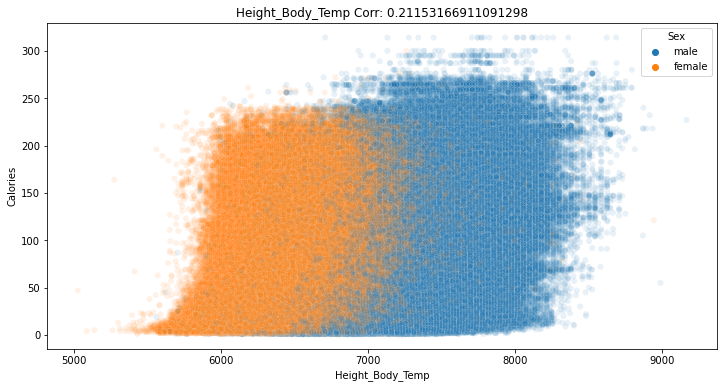

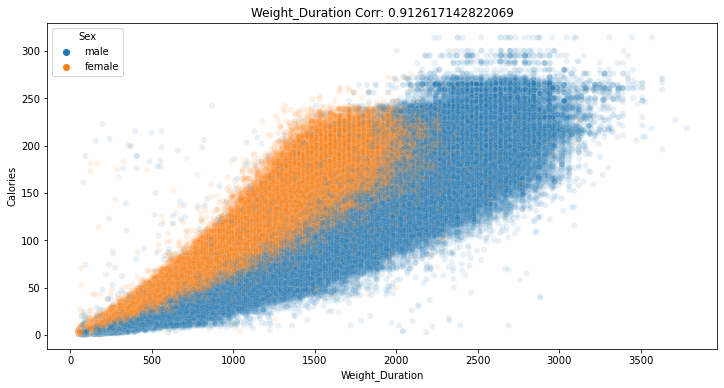

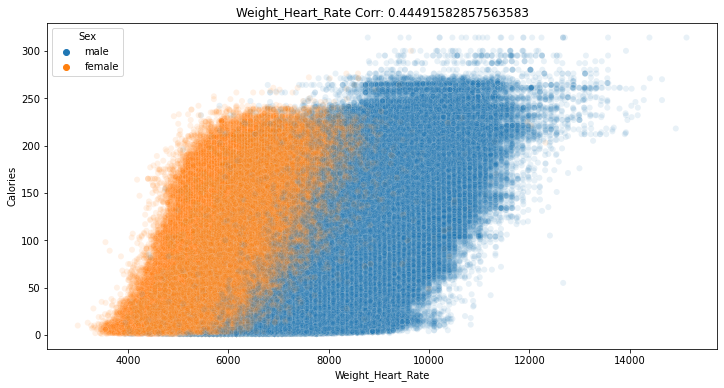

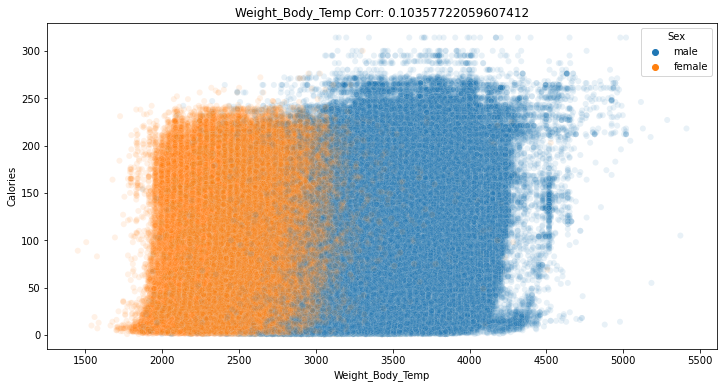

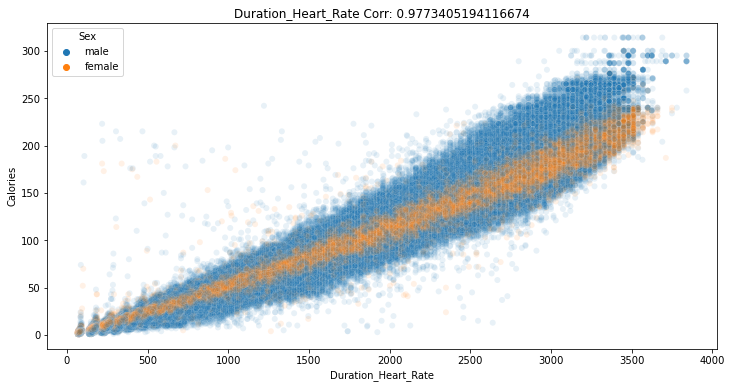

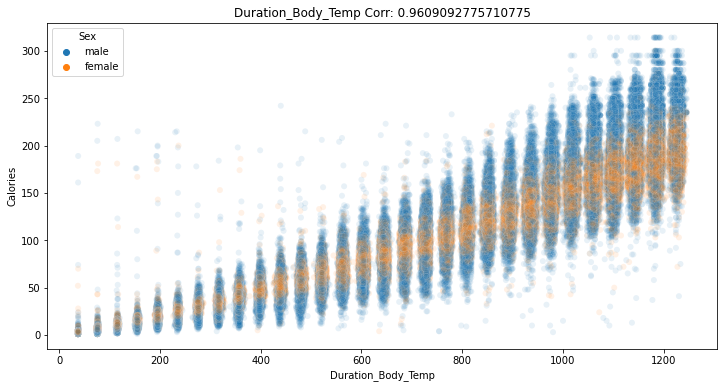

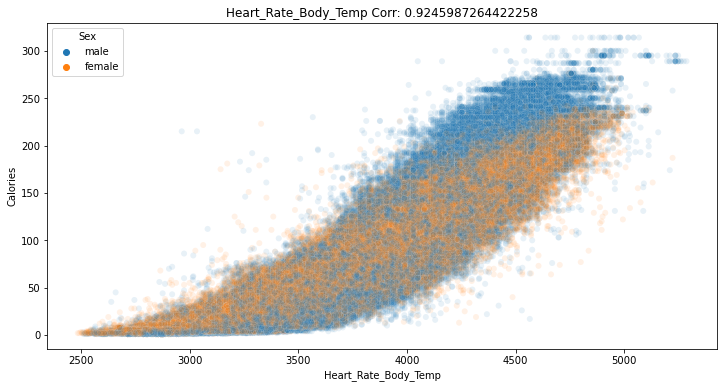

In [17]:
for col in df_train_ply.columns.tolist():
    
    if col in ['Calories', 'Sex']:
        continue
    
    plt.figure(figsize=(12, 6))
    plt.title(col + ' Corr: ' + str(np.corrcoef(df_train_ply['Calories'], df_train_ply[col])[0][1]))
    sns.scatterplot(data=df_train_ply , x=col, y='Calories', alpha=.1, hue='Sex')
    plt.show()

In [51]:
high_corr = df_train_ply.corr()['Calories']
high_corr = high_corr[high_corr.between(0.3, 0.999)]

df_train = df_train.join(df_train_ply[high_corr.index])

C:\Users\Fury\AppData\Local\Temp\ipykernel_28892\2371706758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_corr = df_train_ply.corr()['Calories']


In [74]:
df_train_pca = df_train.copy()
df_train_pca = df_train_pca.drop(columns=['id', 'Calories', 'Sex'])
# df_train_pca['Sex'] = df_train_pca['Sex'].map({'male': 0, 'female': 1})

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

In [77]:
# df_train_pca.loc[:] = StandardScaler().fit_transform(df_train_pca)
df_train_pca.loc[:] = PowerTransformer(method='box-cox', standardize=True).fit_transform(df_train_pca)

In [94]:
df_train_pca.shape

(750000, 15)

In [106]:
pca = PCA(n_components=0.99)
pca.fit(df_train_pca);

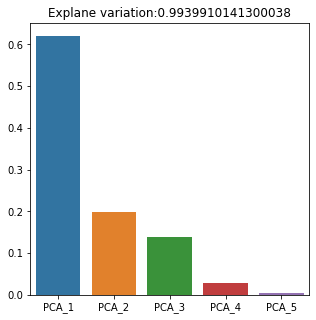

In [130]:
plt.figure(figsize=(5, 5))
plt.title(('Explane variation:'+str(sum(pca.explained_variance_ratio_))))
sns.barplot(y=pca.explained_variance_ratio_, x=['PCA_'+str(x+1) for x in range(pca.n_components_)])
plt.show()

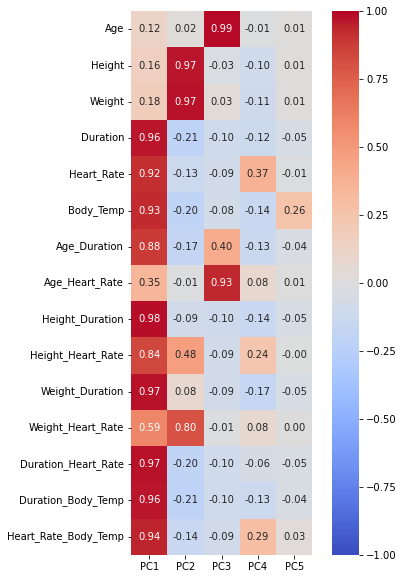

In [114]:
loadings_df = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
                           index=pca.feature_names_in_,
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])

plt.figure(figsize=(7, 10))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1, vmax=1)
plt.show()

In [142]:
pca_graf = df_train[['Calories', 'Sex']].copy()
pca_graf.loc[:, ['PCA_'+str(x+1) for x in range(pca.n_components_)]] = pca.transform(df_train_pca)

C:\Users\Fury\AppData\Local\Temp\ipykernel_28892\1843487099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pca_graf.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1, vmax=1)


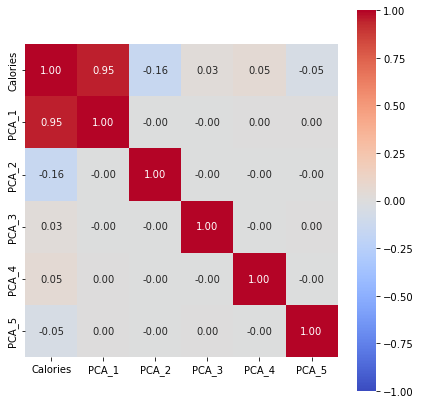

In [145]:
plt.figure(figsize=(7, 7))
sns.heatmap(pca_graf.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1, vmax=1)
plt.show()

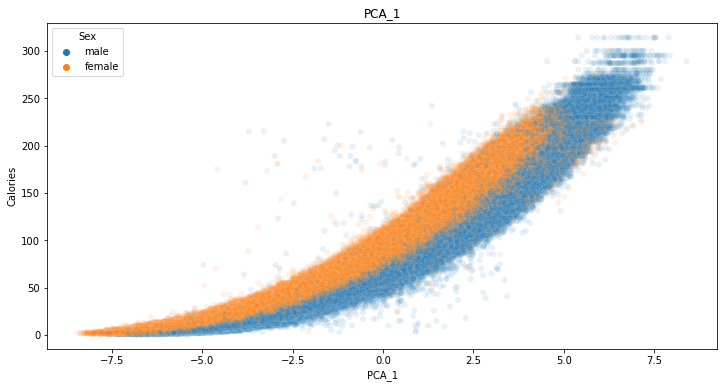

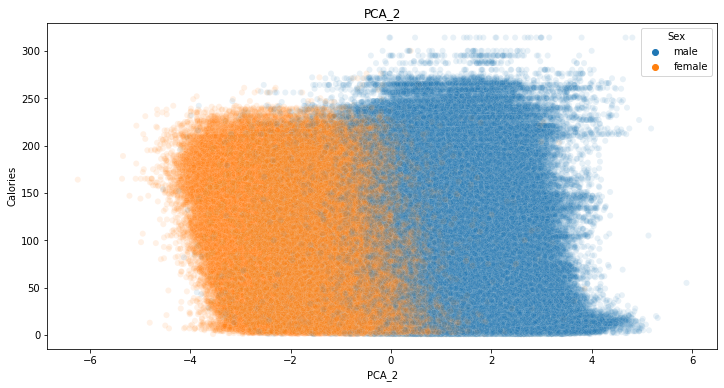

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


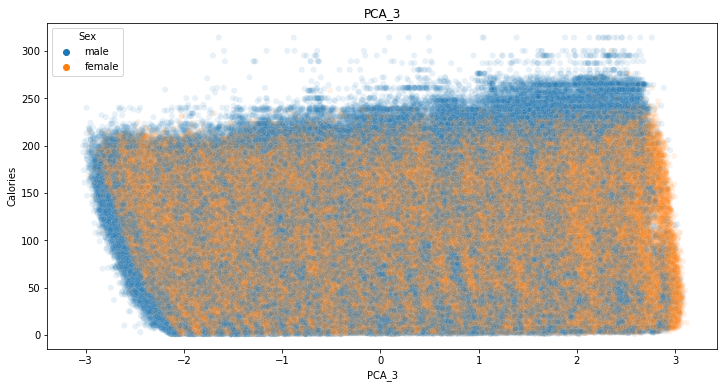

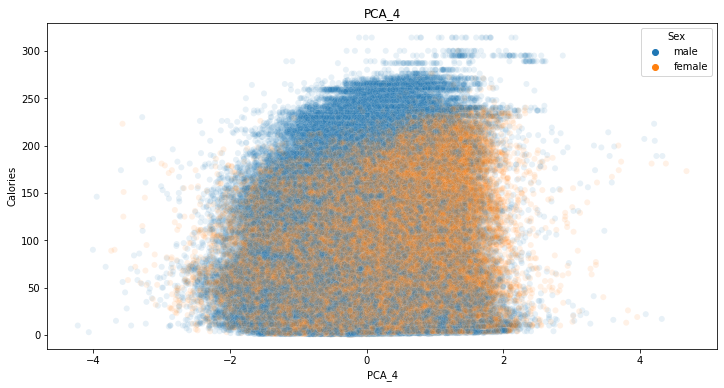

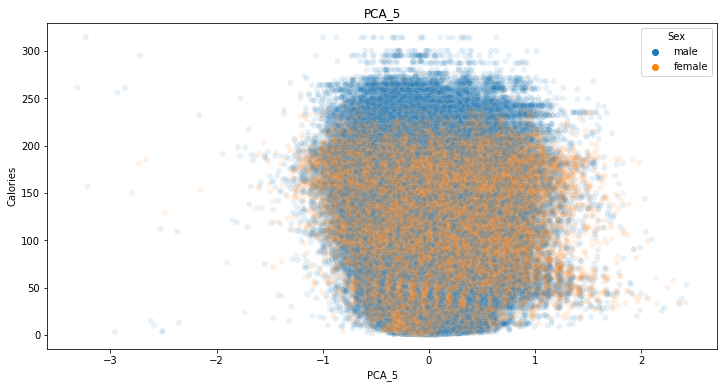

In [143]:
for col in ['PCA_'+str(x+1) for x in range(pca.n_components_)]:
    
    plt.figure(figsize=(12, 6))
    plt.title(col)
    sns.scatterplot(data=pca_graf , x=col, y='Calories', alpha=.1, hue='Sex')
    plt.show()

In [ ]:
PCA
xgboost